<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Lecture_code/L3-overfitting-underfitting.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; for interacting with the code


---
# Polynomial regression- Overfitting and underfitting
---

This is the lecture note for **overfitting and underfitting**

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to overfitting and underfitting. I encourage you to read further about overfitting and underfitting. </p>

Read more:

- [Overfitting wikipedia](https://en.wikipedia.org/wiki/Overfitting)
- [Underfitting vs overfitting sklearn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)
- [Polynomial regression](https://en.wikipedia.org/wiki/Polynomial_regression)
- [PolynomialFeatures sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
- [6.3.7 Generating polynomial features](https://scikit-learn.org/stable/modules/preprocessing.html#polynomial-features)
- [Bias-variance tradeoff towards datascience](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)
- [Bias-variance tradeoff wikipedia](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)
---


In [108]:
import numpy as np 
import matplotlib.pyplot as plt 

# plt.style.use("seaborn-white")

---
## Simulate data

Simulate from a 2nd order polynomial with Gaussian noise i.e. 

$$y = a_0 + a_1x + a_2x^2 + \epsilon ,$$ 
where $\epsilon \sim \mathcal{N(0,1)}$

In [109]:
np.random.seed(42)
samples = 100
X = np.random.uniform(-3,3, (samples,1))

f = lambda x: x**2 + .5*x + 3

y = f(X) + np.random.randn(samples,1) # adds an epsilon standard normally distributed (gaussian noize)

X.shape, y.shape

((100, 1), (100, 1))

In [110]:
x = np.linspace(-3,3,100)
x

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

[[-3.        ]
 [-2.93939394]
 [-2.87878788]
 [-2.81818182]
 [-2.75757576]
 [-2.6969697 ]
 [-2.63636364]
 [-2.57575758]
 [-2.51515152]
 [-2.45454545]
 [-2.39393939]
 [-2.33333333]
 [-2.27272727]
 [-2.21212121]
 [-2.15151515]
 [-2.09090909]
 [-2.03030303]
 [-1.96969697]
 [-1.90909091]
 [-1.84848485]
 [-1.78787879]
 [-1.72727273]
 [-1.66666667]
 [-1.60606061]
 [-1.54545455]
 [-1.48484848]
 [-1.42424242]
 [-1.36363636]
 [-1.3030303 ]
 [-1.24242424]
 [-1.18181818]
 [-1.12121212]
 [-1.06060606]
 [-1.        ]
 [-0.93939394]
 [-0.87878788]
 [-0.81818182]
 [-0.75757576]
 [-0.6969697 ]
 [-0.63636364]
 [-0.57575758]
 [-0.51515152]
 [-0.45454545]
 [-0.39393939]
 [-0.33333333]
 [-0.27272727]
 [-0.21212121]
 [-0.15151515]
 [-0.09090909]
 [-0.03030303]
 [ 0.03030303]
 [ 0.09090909]
 [ 0.15151515]
 [ 0.21212121]
 [ 0.27272727]
 [ 0.33333333]
 [ 0.39393939]
 [ 0.45454545]
 [ 0.51515152]
 [ 0.57575758]
 [ 0.63636364]
 [ 0.6969697 ]
 [ 0.75757576]
 [ 0.81818182]
 [ 0.87878788]
 [ 0.93939394]
 [ 1.     

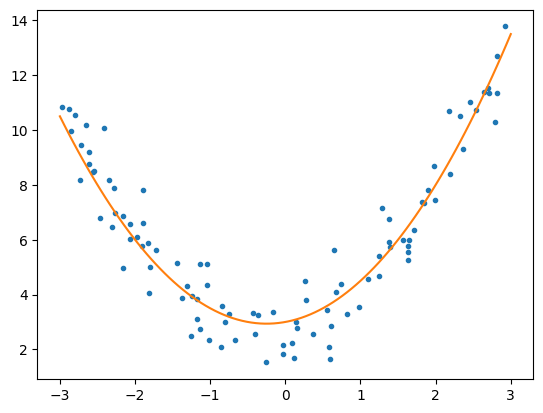

In [111]:
x = np.linspace(-3,3,100).reshape(100,1) # x.shape (100,) -> (100,1)
print(x)
plt.plot(X, y, '.')
plt.plot(x, f(x))

<AxesSubplot: title={'center': '$y = x^2 + 0.5x + 3 + \\epsilon$'}, xlabel='x', ylabel='y'>

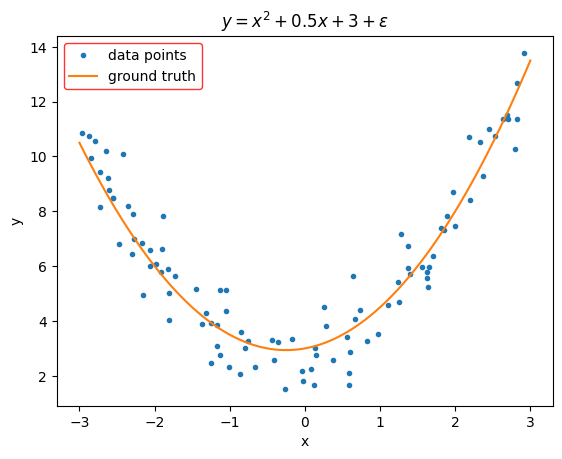

In [112]:
def draw_data():
    fig = plt.figure(dpi = 100)
    ax = plt.axes()
    ax.plot(X,y, '.', label="data points")
    x = np.linspace(-3,3, samples).reshape(-1,1)    # -1 tvingar programmet att själv räkna ut vad den dimensionen skall vara
    ax.plot(x, f(x), label = "ground truth")       # true fraction
    ax.set(title=r"$y = x^2 + 0.5x + 3 + \epsilon$", xlabel = "x", ylabel = "y")
    ax.legend(edgecolor="r")

    return ax

draw_data()

---

## Polynomial regression

Polynomial regression fits a polynomial of order $n$ to model the relationship between independent variable $x$ and dependent variable $y$. The polynomial regression model in general:

$$y = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n + \epsilon $$

It is linear in terms of the unknown parameters $\beta_i$, and can be expressed in matrix form and solved using OLS normal equation as we did for multiple linear regression. In fact polynomial regression is a special case of multiple linear regression.

$$
\begin{pmatrix}
 y_1\\
 y_2\\
 \vdots\\
 y_n\\
\end{pmatrix} =
\begin{pmatrix}
 1&  x_1& x_1^2  &\dots & x_1^m \\
 1&  x_2& x_2^2 & \dots & x_2^m\\
 \vdots&\vdots  &\vdots  &\ddots & \vdots\\
 1& x_n & x_n^2 & \dots & x_n^m\\
\end{pmatrix}
\begin{pmatrix}
 \beta_0\\
 \beta_1\\
 \vdots\\
 \beta_m\\
\end{pmatrix} + 

\begin{pmatrix}
 \epsilon_0\\
 \epsilon_1\\
 \vdots\\
 \epsilon_n\\
\end{pmatrix}
$$

Using ```sklearn.preprocessing.PolynomialFeatures``` we can feature engineer new features that previously didn't exist. It creates a feature matrix that represent polynomial combinations. For example $X = (X_1, X_2)$ would be transformed to ($1, X_1, X_2, X_1^2, X_2^2, X_1X_2, X_2^2)$ using degree 2, if bias is included, if bias is excluded 1 disappears.

### Feature engneering

- constructed features

In [113]:
from sklearn.preprocessing import PolynomialFeatures # NOTE preprocessing

# artifically constructs features to a certain degree
# PolynomialFeatures creates feature matrix to represent the polynomial combinations

polynomial_instance = PolynomialFeatures(degree = 2, include_bias=False) # False does not give columns of ones thus no beta_0
                                                                            # beta_0 is generated by LinReg in next step

polynomial_features = polynomial_instance.fit_transform(X) # both train and test are transformed
print(polynomial_features.shape)
polynomial_features[:5], X[:5], .75**2, 2.7**2


(100, 2)


(array([[-0.75275929,  0.56664654],
        [ 2.70428584,  7.3131619 ],
        [ 1.39196365,  1.93756281],
        [ 0.59195091,  0.35040587],
        [-2.06388816,  4.25963433]]),
 array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091],
        [-2.06388816]]),
 0.5625,
 7.290000000000001)

In [114]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(polynomial_features, y) # train model (on all data in this case) to get betas
model.coef_  # beta_1, beta_2; beta_0 not because did not include ones in X during preprocessing by include_bias = False

array([[0.43366893, 1.06456263]])

In [115]:
model.intercept_ # beta_0

array([2.78134581])

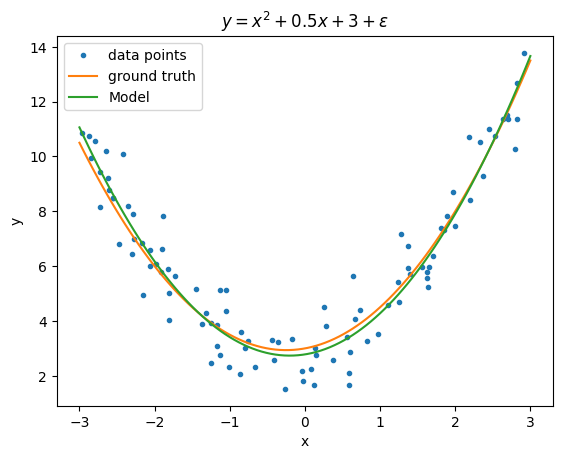

In [116]:
x = np.linspace(-3,3, samples).reshape(-1,1) # can be seen as test data in this case
x_polynomial_features = polynomial_instance.transform(x)

y_pred = model.predict(x_polynomial_features) #x_polynomial_features are the engineered data so get polynom - see (*)

ax = draw_data()
ax.plot(x, y_pred, label = "Model")
ax.legend();    #; gör att onödig text inte skrivs ut i jupiter notebook

---
## Underfitting

Underfitting is when a model is too simple to represent the data accurately. 

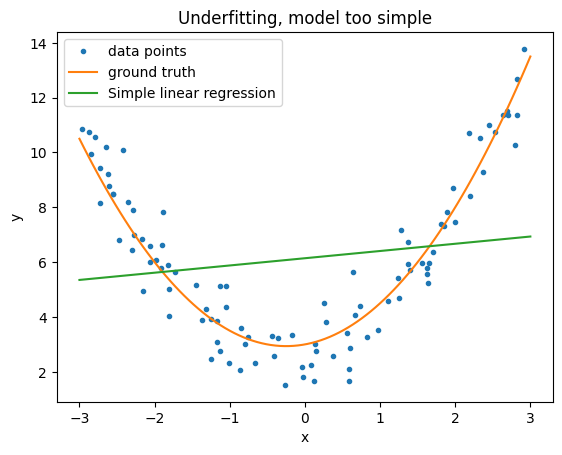

In [117]:
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(x)

ax = draw_data()
ax.plot(x, y_pred, label = "Simple linear regression") # (*) using nonengineered data so do not get polynomial
ax.legend()
ax.set(title="Underfitting, model too simple");

---
## Overfitting

Model too complicated, and fitted too much to the data. Complicated model (high variance) risk to fit to noise in training data, which make them generalize worse. Overfitting usually occurs when there is too small traning set, and/or it is not representative for testing data.

(100, 30)


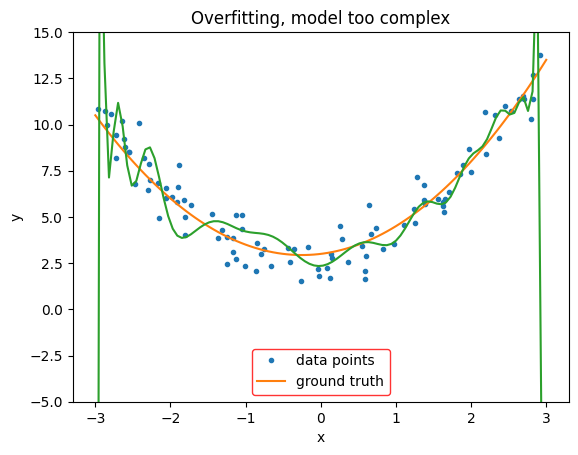

In [118]:
polynomial_instance_30 = PolynomialFeatures(30, include_bias=False)
X_features = polynomial_instance_30.fit_transform(X)
print(X_features.shape)

model = LinearRegression()
model.fit(X_features, y)

x_polynomial_features = polynomial_instance_30.transform(x.reshape(-1,1))
y_pred = model.predict(x_polynomial_features)

ax = draw_data()
ax.plot(x, y_pred)

ax.set(title="Overfitting, model too complex", ylim=[-5,15]);

# The model captures more points in training data but can't generalize to test data 

---
## Choose a model

Note that we are not always able to plot the data and its corresponding graphs as our data might be high dimensional. In order to choose correct model we can use a cost/loss function to keep track of the error for different models (different degrees of polynomial).

In [119]:
# we increase number of simulated samples
np.random.seed(42)
samples = 10000
X = np.random.uniform(-3, 3, (samples, 1))
f = lambda x: x**4 + x**2 + 0.5 * x + 3  # change model to 3rd degree polynomial
y = f(X) + np.random.randn(samples, 1)  # adds epsilon to f(X)

print(f"X.shape: {X.shape}, y.shape: {y.shape}")


X.shape: (10000, 1), y.shape: (10000, 1)


### Train|Validation|Test split

We split our data set into 
- training set
- validation set
- testing set

Reason for this split is to use the validation data for choosing the degree of the polynomial (a hyperparameter)

In [120]:
from sklearn.model_selection import train_test_split
# help (train_test_split)

# use train_test_split twice to obtain train|val|test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
    
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((6700, 1), (6700, 1), (1650, 1), (1650, 1), (1650, 1), (1650, 1))

### Elbow plot - Fit model and predict

In [130]:
from sklearn.metrics import mean_squared_error

RMSE_val = []

for degree in range(1,100):
    model_poly = PolynomialFeatures(degree, include_bias=False) # bias False for LinearRegression has intercept by default so do not need to add col w ones
                                                                # this is build in alrady in LinReg, but need include_bias = True for other models
    train_features = model_poly.fit_transform(X_train)  # feature eng on train data
    val_features = model_poly.transform(X_val)          # feature eng on valdation data
    
    model_lin_reg = LinearRegression()
    model_lin_reg.fit(train_features, y_train)
    
    y_pred_val = model_lin_reg.predict(val_features)
    
    RMSE_val.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))

Text(0.5, 1.0, 'RMSE on validation data for different degrees of polynomial')

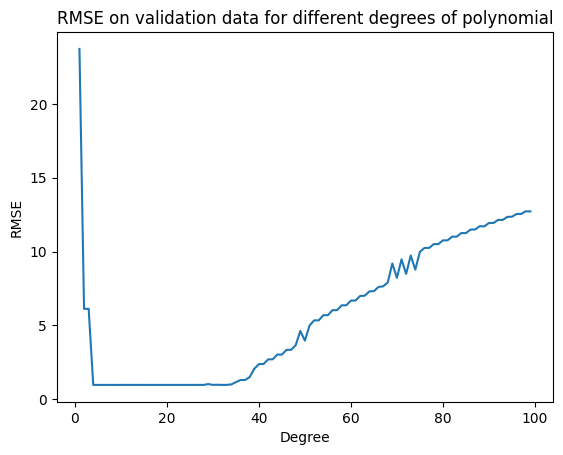

In [140]:
plt.plot(range(1,100), RMSE_val)
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.title('RMSE on validation data for different degrees of polynomial')

#### Zooming in on first 10 points

choose deg 4


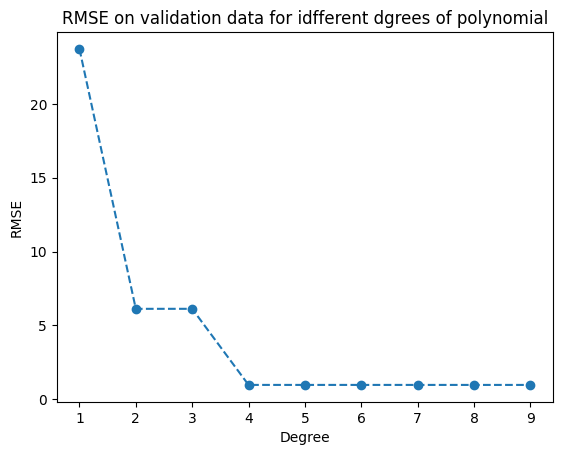

In [138]:
plt.plot(range(1,10), RMSE_val[:9], '--o')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.title('RMSE on validation data for idfferent dgrees of polynomial')

print('choose deg 4')

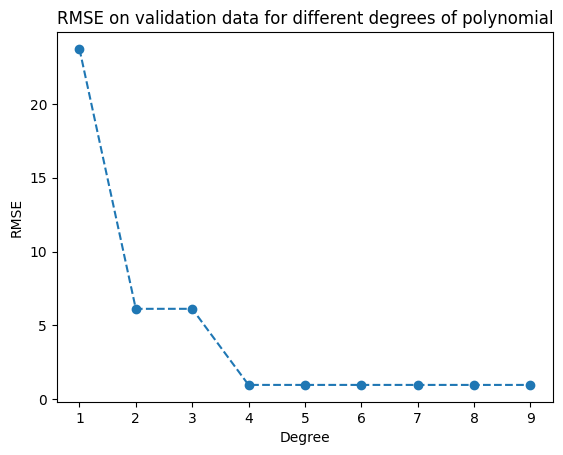

In [139]:
# pythonic way to plot same as above

fig, ax = plt.figure(), plt.axes()

ax.plot(range(1,10), RMSE_val[:9],'--o', label = "Validation")
ax.set(xlabel = "Degree", ylabel = "RMSE", title = "RMSE on validation data for different degrees of polynomial");
# we see that from degreen 4 the error is low, and it doesn't change much when going higher degrees
# hence we would choose degree 4 here, which corresponds to our simulated polynomial degree. 
# this type of plot is called elbow plot.
# now we could move on to train the model using degree 4 and then predict on testing data

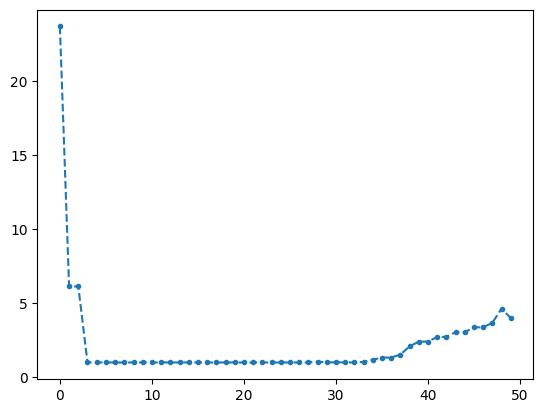

In [124]:
ax = plt.axes()

# try much higher degree polynomials and see that error actually increases 
# note that this might happen much faster for real data 
ax.plot(range(50), RMSE_val[:50],'--.', label = "Validation");

---
## Bias-Variance Trade-off

A models generalization error is bias + variance + irreducible error

- bias - difference between average prediction and correct value. 
    - high bias, pay little attention to data, 
    - oversimplifies and underfits.
- variance - spread of our data
    - many degrees of freedom  -> high variance -> overfit to data
- irreducible error - due to noise of data, only way to decrease this is to clean the data itself.

Higher model complexity -> higher variance, lower bias

Lower model complexity -> lower variance, higher bias

The goal is to choose a model that is complex enough not to underfit, but not too complex to overfit. Need to find a balance between bias and variance. 

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---
